# Optimization of Log Loss

In classification tasks, **Log Loss** (also known as Binary Cross-Entropy) is the standard loss function used to measure the performance of a model whose output is a probability value between 0 and 1. Optimizing Log Loss is the core of Logistic Regression.

## 1. Theory: What is Log Loss?

Suppose we have a set of $n$ binary observations $y_1, y_2, ..., y_n$ where each $y_i \in \{0, 1\}$. We want to find a single probability $p$ that "best" represents these observations.

The **Log Loss** for a single observation $y_i$ and a predicted probability $p$ is:
$$L(y_i, p) = -(y_i \ln(p) + (1 - y_i) \ln(1 - p))$$

The **Total Log Loss** for the entire dataset is:
$$J(p) = -\sum_{i=1}^{n} [y_i \ln(p) + (1 - y_i) \ln(1 - p)]$$

### Why Log Loss?
1. **Information Theory**: It is derived from the concept of Likelihood. Minimizing log loss is equivalent to Maximum Likelihood Estimation (MLE).
2. **Convexity**: $J(p)$ is a convex function, ensuring a single global minimum.
3. **Penalty**: It heavily penalizes confident but wrong predictions (e.g., predicting $p \approx 1$ when $y=0$).

---

## 2. Optimization: Finding the Minimum

To find the value of $p$ that minimizes $J(p)$, we take the derivative with respect to $p$ and set it to zero.

### Step 1: Differentiate $J(p)$
Using the derivative of $\ln(x)$ which is $1/x$:
$$\frac{d}{dp} J(p) = -\sum_{i=1}^{n} \left[ y_i \frac{1}{p} + (1 - y_i) \frac{-1}{1 - p} \right]$$
$$\frac{d}{dp} J(p) = -\sum_{i=1}^{n} \left[ \frac{y_i}{p} - \frac{1 - y_i}{1 - p} \right]$$

### Step 2: Set the derivative to zero
$$-\sum_{i=1}^{n} \left[ \frac{y_i}{p} - \frac{1 - y_i}{1 - p} \right] = 0$$
$$\sum_{i=1}^{n} \frac{y_i(1 - p) - (1 - y_i)p}{p(1 - p)} = 0$$
$$\sum_{i=1}^{n} \frac{y_i - y_i p - p + y_i p}{p(1 - p)} = 0$$
$$\sum_{i=1}^{n} \frac{y_i - p}{p(1 - p)} = 0$$

### Step 3: Solve for $p$
Since the denominator $p(1-p)$ is constant for the summation:
$$\frac{1}{p(1 - p)} \sum_{i=1}^{n} (y_i - p) = 0$$
$$\sum_{i=1}^{n} y_i - \sum_{i=1}^{n} p = 0$$
$$\sum_{i=1}^{n} y_i - n p = 0$$
$$n p = \sum_{i=1}^{n} y_i$$
$$p = \frac{1}{n} \sum_{i=1}^{n} y_i$$

**Conclusion:** The value that minimizes the Log Loss is the **proportion of positive classes** (the mean) in the dataset!


## 3. Python Implementation and Illustration

Let's visualize the Log Loss function and verify the minimum.


Data points (y): [0 0 1 1 1]
Proportion of 1s (Mean): 0.6


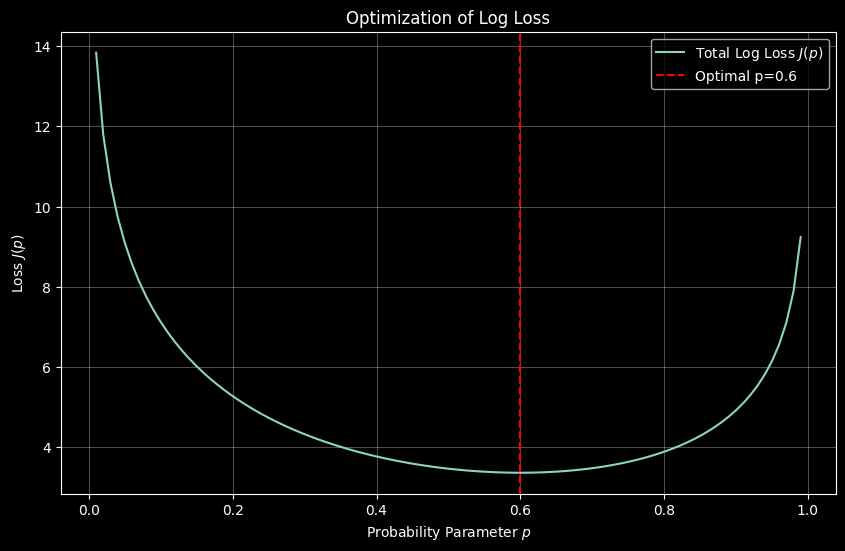

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate some binary data
y = np.array([0, 0, 1, 1, 1]) # Mean is 0.6
mean_y = np.mean(y)

print(f"Data points (y): {y}")
print(f"Proportion of 1s (Mean): {mean_y}")

# 2. Define the Total Log Loss function
def total_log_loss(p, observations):
    # Clip p to avoid log(0)
    p = np.clip(p, 1e-15, 1 - 1e-15)
    return -np.sum(observations * np.log(p) + (1 - observations) * np.log(1 - p))

# 3. Calculate loss for a range of p values
p_range = np.linspace(0.01, 0.99, 100)
losses = [total_log_loss(p, y) for p in p_range]

# 4. Plotting
plt.figure(figsize=(10, 6))
plt.plot(p_range, losses, label='Total Log Loss $J(p)$')
plt.axvline(mean_y, color='red', linestyle='--', label=f'Optimal p={mean_y}')

plt.title('Optimization of Log Loss')
plt.xlabel('Probability Parameter $p$')
plt.ylabel('Loss $J(p)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Symbolic Verification with SymPy


In [2]:
from sympy import symbols, Sum, IndexedBase, Idx, log, diff, simplify
from IPython.display import display

n = symbols('n', integer=True)
i = symbols('i', cls=Idx)
y_i = IndexedBase('y')
p = symbols('p')

# Define the Log Loss function
log_loss = -Sum(y_i[i] * log(p) + (1 - y_i[i]) * log(1 - p), (i, 1, n))
print("Cost Function J(p):")
display(log_loss)

# Differentiate with respect to p
derivative = diff(log_loss, p)
print("\nDerivative dJ/dp:")
display(simplify(derivative))

# Solving logic
print("\nSolving dJ/dp = 0 leads to:")
print("Sum(y_i/p - (1-y_i)/(1-p)) = 0")
print("Sum((y_i(1-p) - p(1-y_i)) / (p(1-p))) = 0")
print("Sum(y_i - p) = 0")
print("Sum(y_i) - n*p = 0")
print("p = Sum(y_i) / n")


Cost Function J(p):


-Sum((1 - y[i])*log(1 - p) + log(p)*y[i], (i, 1, n))


Derivative dJ/dp:


Sum(-1 + y[i]/p, (i, 1, n))/(p - 1)


Solving dJ/dp = 0 leads to:
Sum(y_i/p - (1-y_i)/(1-p)) = 0
Sum((y_i(1-p) - p(1-y_i)) / (p(1-p))) = 0
Sum(y_i - p) = 0
Sum(y_i) - n*p = 0
p = Sum(y_i) / n


## 4. Key Takeaway

Just like Squared Loss, the **Log Loss** is minimized by the **mean** of the observations. In classification, this mean represents the frequency of the positive class. This is why a model that always predicts the global average probability is the "best" baseline model under Log Loss.
